<center>

# **LAB 1**

# **DATA RELATIONSHIP**



</center>

<center>

# **Mục lục** <a name = "TOC"></a>

</center>

- [1. Giới thiệu thành viên](#section1)
- [2. Các thư viện sử dụng](#section2)
- [3. Mô tả dữ liệu](#section3)
- [4. Xử lý dữ liệu](#section4)
    - [4.1. Đọc dữ liệu vào Dataframe](#section4_1)
    - [4.2. Số dòng và số cột của tập dữ liệu](#section4_2)
    - [4.3. Ý nghĩa của mỗi dòng](#section4_3)
    - [4.4. Kiểm tra các dòng bị trùng lắp](#section4_4)
    - [4.5. Ý nghĩa của mỗi cột](#section4_5)
    - [4.6. Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp](#section4_6)
    - [4.7. Tìm sự phân phối của các cột dữ liệu kiểu số](#section4_7)
    - [4.8. Tìm sự phân phối của các cột dữ liệu phân loại](#section4_8)
    - [4.9. Xử lý các dòng bị thiếu dữ liệu](#section4_9)
- [5. Phân tích dữ liệu](#section5)
    - [6.1. Loại bỏ các cột không cần thiết, thiếu dữ liệu khi trực quan hóa bằng heatmap](#section5_1)
    - [6.2. Câu hỏi số 2](#section5_2)
    - [6.3. Câu hỏi số 3](#section5_3)
    - [6.4. Câu hỏi số 4](#section5_4)
    - [6.5. Câu hỏi số 5](#section5_5)
    - [6.6. Mối quan hệ giữa totaldeaths, total recovered và activecases (trực quan bằng barchart)](#section5_6)
    - [6.7. Câu hỏi số 7](#section5_7)
    - [6.8. Câu hỏi số 8](#section5_8)
    - [6.9. Câu hỏi số 9](#section5_9)
- [6. Đôi điều về đồ án](#section6)
- [7. Các nguồn tham khảo](#section7)

# **1. Giới thiệu thành viên** <a name = "section1"></a>
[Quay về mục lục](#TOC)

| STT | MSSV | HỌ VÀ TÊN | CÔNG VIỆC|
|:----:|:---:|:------:|:------:|
| 1 | 20127023 | Trần Minh Hiệp | Lựa chọn, phân tích dữ liệu, vẽ biểu đồ Pie Chart. |
| 2 | 20127058 | Lê Hồ Bảo Nhật | Lựa chọn, phân tích dữ liệu, vẽ biểu đồ Pie Chart. |
| 3 | 20127088 | Nguyễn Thiện Hoàng Trí | Lựa chọn, phân tích dữ liệu, vẽ biểu đồ Pie Chart. |
| 4 | 20127288 | Nguyễn Nam Phương | Lựa chọn, phân tích dữ liệu, vẽ biểu đồ Pie Chart.|
| 5 | 20127603 | Ninh Trần Hoàng Quân | Lựa chọn, phân tích dữ liệu, vẽ biểu đồ Pie Chart. |

---

# **2. Các thư viện sử dụng** <a name = "section2"></a>
[Quay về mục lục](#TOC)

In [355]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import statsmodels.api as sm
import statistics
sns.set()

In [356]:
sns.set_style("whitegrid")
a2_dims = (23.4, 16.5)
a3_dims = (16.5, 11.7)
a4_dims = (11.7, 8.27)

---

# **3. Mô tả dữ liệu** <a name = "section3"></a>
[Quay về mục lục](#TOC)

Từ khoảng cuối năm 2019 và đầu năm 2020, một bệnh dịch hạch lan tràn khủng khiếp trên toàn 
thế giới. Mỗi ngày có hàng ngàn người bị nhiễm và hàng chục đến hàng trăm người chết. Tổ chức 
Worldometer [**(www.worldometers.info)**](https://www.worldometers.info/) đã thu thập dữ liệu thống kê từ nhiều nguồn và từ nhiều quốc 
gia báo cáo hàng ngày để tổng hợp thành một bảng trong Hình 1. Trong trang web, tổ chức 
Worldmeter cũng thực hiện vẽ biểu đồ để cho thấy sự thay đổi trực quan tình hình diễn biến dịch 
bệnh. 

---

# **4. Xử lý dữ liệu** <a name = "section4"></a>
[Quay về mục lục](#TOC)

## 4.1. Đọc dữ liệu vào Dataframe <a name = "section4_1"></a>
[Quay về mục lục](#TOC)

In [357]:
try:
    covid19_df = pd.read_csv("covid19_05_03_2023.csv", 
            usecols=lambda x: x != 'index'
                )
except:
    covid19_df = pd.read_csv("covid19_05_03_2023.csv")
covid19_df.head()

,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,North America,124725126,NaN,1612592.0,NaN,120021937.0,1529.0,3090597.0,7892.0,NaN,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,214494303,19555.0,1537456.0,125.0,199126511.0,17607.0,13830336.0,15479.0,NaN,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,Europe,246578283,18461.0,2019397.0,48.0,242121931.0,24102.0,2436955.0,6475.0,NaN,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,68046073,167.0,1350933.0,8.0,66293956.0,111.0,401184.0,10185.0,NaN,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,Oceania,14015805,NaN,26203.0,NaN,13852354.0,NaN,137248.0,55.0,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
def preprocess(df):
    df['country_other'] = df['country_other'].str.strip()
    df = df[df['country_other']!='']
    df_ = df.copy()
    df_.replace(to_replace = r'\D',value = '',regex=True,inplace = True)
    df_.iloc[:,0] = df.iloc[:,0]
    df_['continent'] = df['continent']
    return df_

In [359]:
try :
    covid19_df = preprocess(covid19_df)
    covid19_df.to_csv('covid19_05_03_2023.csv', index=False)
    covid19_df = pd.read_csv('covid19_05_03_2023.csv')
except:
    pass
covid19_df.head()

,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,North America,124725126,NaN,1612592.0,NaN,120021937.0,1529.0,3090597.0,7892.0,NaN,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,214494303,19555.0,1537456.0,125.0,199126511.0,17607.0,13830336.0,15479.0,NaN,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,Europe,246578283,18461.0,2019397.0,48.0,242121931.0,24102.0,2436955.0,6475.0,NaN,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,68046073,167.0,1350933.0,8.0,66293956.0,111.0,401184.0,10185.0,NaN,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,Oceania,14015805,NaN,26203.0,NaN,13852354.0,NaN,137248.0,55.0,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN


## 4.2. Số dòng và số cột của tập dữ liệu <a name = "section4_2"></a>
[Quay về mục lục](#TOC)

In [360]:
row = covid19_df.shape[0]
col = covid19_df.shape[1]
print('Số dòng:', row)
print('Số cột', col)
covid19_df.head()

Số dòng: 246
Số cột 21


,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,North America,124725126,NaN,1612592.0,NaN,120021937.0,1529.0,3090597.0,7892.0,NaN,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,214494303,19555.0,1537456.0,125.0,199126511.0,17607.0,13830336.0,15479.0,NaN,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,Europe,246578283,18461.0,2019397.0,48.0,242121931.0,24102.0,2436955.0,6475.0,NaN,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,68046073,167.0,1350933.0,8.0,66293956.0,111.0,401184.0,10185.0,NaN,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,Oceania,14015805,NaN,26203.0,NaN,13852354.0,NaN,137248.0,55.0,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN


## 4.3. Ý nghĩa của mỗi dòng <a name = "section4_3"></a>
[Quay về mục lục](#TOC)

Mỗi dòng là thông tin của một nước về tổng số ca, số ca tử vong, đang điều trị và hồi phục.

## 4.4. Kiểm tra các dòng bị trùng lắp <a name = "section4_4"></a>
[Quay về mục lục](#TOC)

In [361]:
duplicated = covid19_df.duplicated()
pd.DataFrame(covid19_df[duplicated==True])

,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop


## 4.5. Ý nghĩa của mỗi cột <a name = "section4_5"></a>
[Quay về mục lục](#TOC)

In [362]:
des_df = pd.read_csv('description.csv', encoding='utf-8')
pd.set_option('display.max_colwidth', None)
des_df

,Đặc trưng,Mô tả
0,country_othe,Tên của mỗi quốc gia.
1,totalcases,Tổng số ca.
2,newcases,Số ca bổ sung mới.
3,totaldeaths,Tổng số người tử vong vì COVID-19.
4,newdeaths,Số ca tử vong mới.
5,totalrecovered,Tổng số bệnh nhân khỏi bệnh COVID-19.
6,newrecovered,Số ca mới bình phục.
7,activecases,Số ca đang điều triị.
8,serious_critical,Số ca nặng.
9,tot_cases_1m_pop,Tổng số trường hợp trên 1 triệu dân.


## 4.6. Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp <a name = "section4_6"></a>
[Quay về mục lục](#TOC)

In [363]:
covid19_df.dtypes

country_other           object
totalcases               int64
newcases               float64
totaldeaths            float64
newdeaths              float64
totalrecovered         float64
newrecovered           float64
activecases            float64
serious_critical       float64
tot_cases_1m_pop       float64
deaths_1m_pop          float64
totaltests             float64
tests_1m_pop           float64
population             float64
continent               object
1_caseevery_x_ppl      float64
1_deathevery_x_ppl     float64
1_testevery_x_ppl      float64
new_cases_1m_pop       float64
new_deaths_1m_pop      float64
active_cases_1m_pop    float64
dtype: object

## 4.7. Tìm sự phân phối của các cột dữ liệu kiểu số <a name = "section4_7"></a>
[Quay về mục lục](#TOC)

In [364]:
num_df = covid19_df.select_dtypes(include='number')

mising_percentage = np.round((num_df.isna().sum() / row) * 100, 3)      # tỉ lệ giá trị bị thiếu
min_values = num_df.min()                                               # các giá trị nhỏ nhất
max_values = num_df.max()                                               # các giá trị lớn nhất

num_cols_distribution = pd.DataFrame(data = np.array((mising_percentage, min_values, max_values)),
                                                      columns = num_df.columns,
                                                      index = ['mising percentage', 'min', 'max'])
num_cols_distribution

,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,totaltests,tests_1m_pop,population,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
mising percentage,0.0,87.398,2.439,92.683,8.537000e+00,84.553,7.724000e+00,42.276,6.098,8.537,1.341500e+01,1.341500e+01,6.911000e+00,6.911,9.35,13.415,91.463,95.935,10.569
min,5.0,1.000,1.000,1.000,2.000000e+00,1.000,0.000000e+00,0.000,16.000,2.000,7.850000e+03,5.091000e+03,7.990000e+02,1.000,153.00,0.000,0.040,0.010,1.000
max,680656727.0,38195.000,6805186.000,181.000,6.534939e+08,43375.000,2.035767e+07,40634.000,873219.000,8730.000,1.167639e+09,2.330212e+07,1.448471e+09,62616.000,626161.00,196.000,455.000,3.000,611101.000


'tot_cases_1m_pop', 'deaths_1m_pop', 'tests_1m_pop', '1_caseevery_x_ppl', '1_deathevery_x_ppl', '1_testevery_x_ppl', 'new_cases_1m_pop', 'new_deaths_1m_pop', 'active_cases_1m_pop'

## 4.8. Tìm sự phân phối của các cột dữ liệu phân loại <a name = "section4_8"></a>
[Quay về mục lục](#TOC)

In [365]:
cat_df = covid19_df.select_dtypes(exclude = 'number')

mising_percentage = (cat_df.isna().sum() / row) * 100           # tỉ lệ giá trị bị thiếu
num_diff_vals = cat_df.apply(lambda col: col.nunique())         # số giá trị khác nhau
diff_vals = cat_df.apply(lambda col: col.dropna().unique())     # các giá trị khác nhau

cat_cols_distribution = pd.DataFrame(data = np.array((mising_percentage, num_diff_vals, diff_vals)),
                                     columns = cat_df.columns,
                                     index = ['mising percentage', 'num_diff_vals', 'diff_vals'])

pd.reset_option("display.max_colwidth")
cat_cols_distribution

,country_other,continent
mising percentage,0.0,1.219512
num_diff_vals,239,7
diff_vals,"[North America, Asia, Europe, South America, O...","[North America, Asia, Europe, South America, A..."


## 4.9. Xử lý các dòng bị thiếu dữ liệu <a name = "section4_9"></a>
[Quay về mục lục](#TOC)

- Từ việc kiểm tra sự phân phối của cột dữ liệu số và cột dữ liệu phân loại thì ta thấy các cột 'newcases', 'newdeaths', 'newrecovered','new_cases_1m_pop',	'new_deaths_1m_pop', 'active_cases_1m_pop' có phần trăm missing value rất cao. Tại sao lại bị missing value như thế vì ữ liệu chúng ta đang làm chỉ có thông tin 1 ngày, các ca tăng lên có thể có hoặc là không, nên tạm thời ta sẽ không xoá những cột này, để tiện cho việc phân tích nhiều ngày liên tiếp.

---

# **5. Phân tích dữ liệu** <a name = "section5"></a>
[Quay về mục lục](#TOC)

## 5.1. Loại bỏ các cột không cần thiết, thiếu dữ liệu khi trực quan hóa bằng heatmap <a name = "section5_1"></a>
[Quay về mục lục](#TOC)

In [366]:
rm_list = ['All', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'World', 'Total:']

In [367]:
covid19_df_hm_full = covid19_df.copy()
covid19_df_hm_full = covid19_df_hm_full[~covid19_df_hm_full['country_other'].isin(rm_list)]
covid19_df_hm_full.reset_index(drop=True, inplace=True)

### Loại bỏ các cột không cần thiết, thiếu dữ liệu khi trực quan hóa bằng heatmap

#### 1. Các cột `new*...` là các cột thể hiện số liệu mới trong ngày, nhưng một số nước không cập nhật các số liệu này thường xuyên nên sẽ có rất nhiều giá trị NaN.

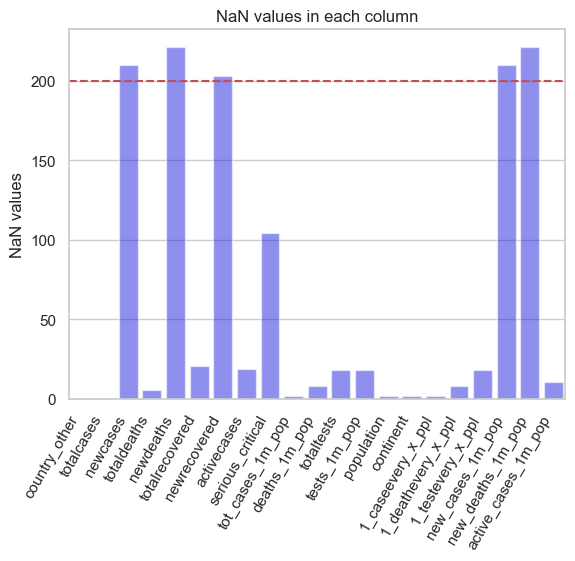

<Figure size 1170x827 with 0 Axes>

In [368]:
bar_nan=pd.DataFrame(covid19_df_hm_full.isna().sum())

sns.barplot(x=bar_nan.index, y=bar_nan[0], color='Blue', alpha=0.5)\
    .set_xticklabels(bar_nan.index, rotation=60, horizontalalignment='right')
plt.axhline(200, color='r', linestyle='--')
plt.ylabel('NaN values')
plt.title('NaN values in each column')
plt.figure(figsize=a4_dims)
plt.show()

- Hơn **200** nước không có dữ liệu về các cột này nên ta sẽ loại bỏ chúng để tránh sai sót trong việc phân tích.

In [369]:
col_rm = bar_nan[bar_nan[0]>200].index.tolist()
col_rm

['newcases',
 'newdeaths',
 'newrecovered',
 'new_cases_1m_pop',
 'new_deaths_1m_pop']

#### 2. Các cột có thể suy ra được bằng cách tính toán từ các cột khác
- Các cột `total...`, `1_..._every_x_ppl`, `...1m_pop`

- Ví dụ:
    - tot_cases_1m_pop = $\frac{totalcases}{population} * 10^6$
    
    - 1_case_every_x_ppl = $\frac{population}{totalcases}$

In [370]:
def prove_1m_pop(col1, col2):
    return ((col1/covid19_df_hm_full['population']*(10**6)).round().replace(np.NaN, 0)\
     == col2.replace(np.NaN, 0).round()).all()

def prove_1e_x(col1, col2):
    return ((covid19_df_hm_full['population']/col1).round().replace(np.NaN, 0)\
        == col2.replace(np.NaN, 0)).all()

In [371]:
print('tot_cases_1m_pop :', prove_1m_pop(covid19_df_hm_full['totalcases'], covid19_df_hm_full['tot_cases_1m_pop']))

tot_cases_1m_pop : True


In [372]:
print('deaths_1m_pop :', prove_1m_pop(covid19_df_hm_full['totaldeaths'], covid19_df_hm_full['deaths_1m_pop']))

deaths_1m_pop : True


In [373]:
print('tests_1m_pop :', prove_1m_pop(covid19_df_hm_full['totaltests'], covid19_df_hm_full['tests_1m_pop']))

tests_1m_pop : True


In [374]:
print('1_caseevery_x_ppl :', prove_1e_x(covid19_df_hm_full['totalcases'], covid19_df_hm_full['1_caseevery_x_ppl']))

1_caseevery_x_ppl : True


In [375]:
#prove new cases 1m pop
print('new_case_1m_pop :', prove_1m_pop(covid19_df_hm_full['newcases'], covid19_df_hm_full['new_cases_1m_pop']))

new_case_1m_pop : True


In [376]:
# prove active cases 1m pop
print('activecases_1m_pop :', prove_1m_pop(covid19_df_hm_full['activecases'], covid19_df_hm_full['active_cases_1m_pop']))

activecases_1m_pop : False


In [377]:
temp=((covid19_df_hm_full['activecases']/covid19_df_hm_full['population']*(10**6)).round().replace(np.NaN, 0) ==\
covid19_df_hm_full['active_cases_1m_pop'].replace(np.NaN, 0).round())
# get false value
temp[temp==False].head()

10    False
65    False
71    False
72    False
77    False
dtype: bool

In [378]:
covid19_df_hm_full.iloc[10][['activecases', 'population', 'active_cases_1m_pop']]

activecases                   NaN
population             85561976.0
active_cases_1m_pop        1819.0
Name: 10, dtype: object

-> False do dữ liệu `active_cases_1m_pop` của những nước này chưa được cập nhật theo `activecases` -> công thức vẫn đúng ở trường hợp này

#### Các cột sẽ được loại bỏ:

In [379]:
col_rm += ['tot_cases_1m_pop', 'deaths_1m_pop', 'tests_1m_pop', '1_caseevery_x_ppl', '1_deathevery_x_ppl', '1_testevery_x_ppl', 'new_cases_1m_pop', 'new_deaths_1m_pop', 'active_cases_1m_pop']
col_rm

['newcases',
 'newdeaths',
 'newrecovered',
 'new_cases_1m_pop',
 'new_deaths_1m_pop',
 'tot_cases_1m_pop',
 'deaths_1m_pop',
 'tests_1m_pop',
 '1_caseevery_x_ppl',
 '1_deathevery_x_ppl',
 '1_testevery_x_ppl',
 'new_cases_1m_pop',
 'new_deaths_1m_pop',
 'active_cases_1m_pop']

In [380]:
def heatmap_(df, size=a2_dims):
    fig, ax = plt.subplots(figsize=size)
    sns.heatmap(
        ax=ax, data=df.corr(),
        annot=True, fmt=".2f", cmap='coolwarm',
        annot_kws={"size": 10},
    )
    plt.show()

### Vẽ biểu đồ heatmap trên dataframe sau khi đã xử lí để quan sát sự tương quan giữa các cột còn lại với nhau

C:\Users\phuon\AppData\Local\Temp\ipykernel_8444\633555370.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=ax, data=df.corr(),


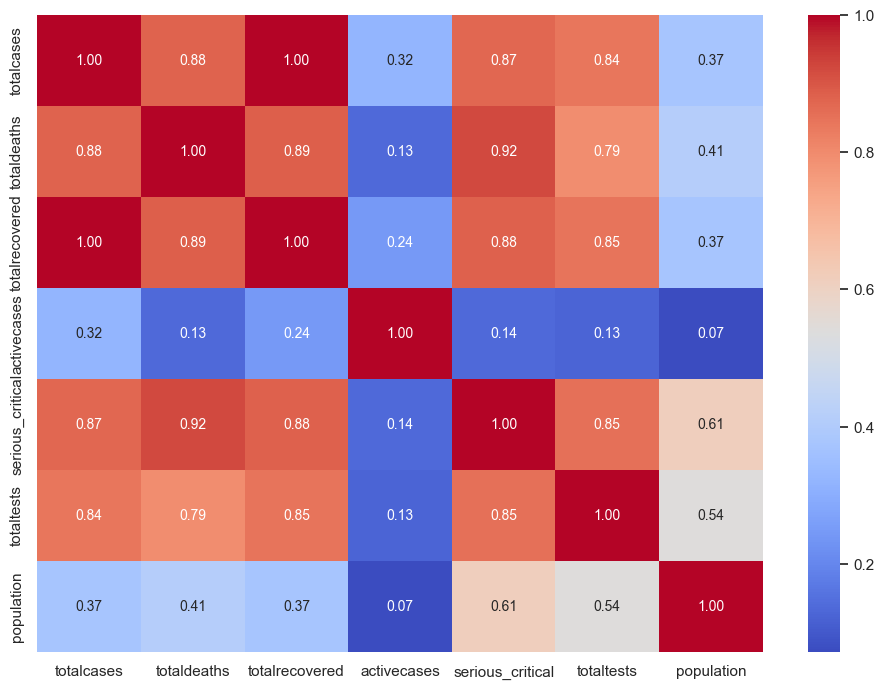

In [381]:
covid19_df_new = covid19_df_hm_full.drop(columns=col_rm, axis=1)
heatmap_(covid19_df_new, a4_dims)

- Ta có thể thấy các cột `totalcases`, `totaldeaths`, `totaltests`, `totalrecovered`, `serious_critical`, `total_tests` có mối tương quan chặt chẽ với nhau
- Sort lại các cột để dễ quan sát hơn

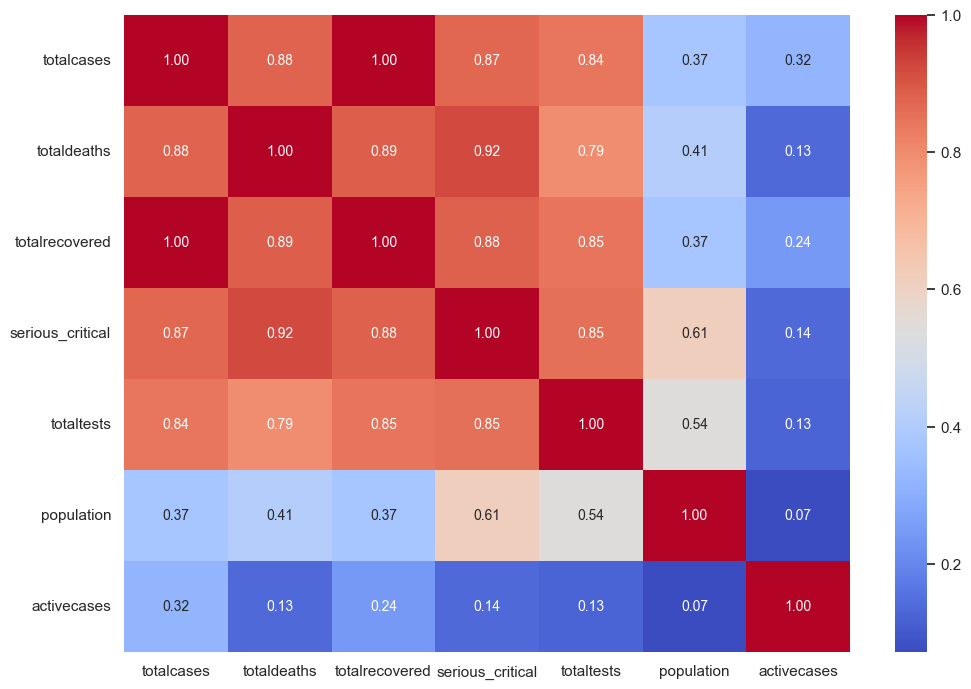

In [382]:
col_sort = ['totalcases', 'totaldeaths', 'totalrecovered', 'serious_critical', 'totaltests', 'population', 'activecases']
heatmap_(covid19_df_new[col_sort], a4_dims)

- Ngoài ra ta cũng có thể thấy `population` tương quan với `serious_critical` và `totaltests`.
- Cho thấy là những nước có dân số càng lớn thì sẽ càng ghi nhận được nhiều người trong tình trạng nghiêm trọng cũng như nhiều người được test hơn các nước có dân số ít hơn.

## 5.2. Câu hỏi số 2 <a name = "section5_2"></a>
[Quay về mục lục](#TOC)

In [383]:
covid19_df_rd = covid19_df.copy().drop(columns=col_rm, axis=1)

In [384]:
radar_data = covid19_df_rd[['totalcases','totaldeaths','totalrecovered','activecases']].iloc[:6,:]
radar_data['Total Deaths / Total Cases'] = radar_data['totaldeaths'] / radar_data['totalcases'] * 100
scale = StandardScaler()
data_ = scale.fit_transform(radar_data)
data_

array([[ 0.12342042,  0.65340255,  0.12651901, -0.06302365,  0.18284396],
       [ 1.10541827,  0.55078052,  1.02764118,  2.17564575, -0.67620962],
       [ 1.45638951,  1.20902375,  1.51742483, -0.19927355, -0.52384361],
       [-0.49659983,  0.29602423, -0.48552494, -0.62362448,  1.21526247],
       [-1.08764465, -1.51331458, -1.08291505, -0.67864123, -1.46621735],
       [-1.10098372, -1.19591645, -1.10314503, -0.61108284,  1.26816415]])

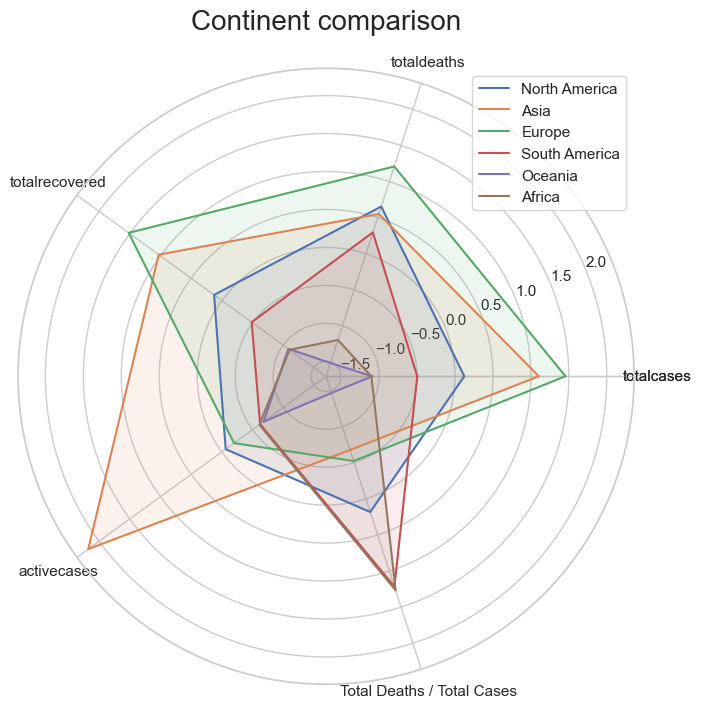

In [385]:
categories = radar_data.columns
categories = [*categories, categories[0]]
radar_ = []
for i in range(6):
    radar_.append([*data_[i],data_[i][0]])

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(radar_[0]))

label = ['North America','Asia','Europe','South America','Oceania','Africa']

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
for i in range(6):
    plt.plot(label_loc, radar_[i], label=label[i])
    plt.fill(label_loc,radar_[i],alpha = 0.1)

plt.title('Continent comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()


Dựa vào radar chart trên ta thấy một số điểm đặc biệt :
- Mặc dù tổng số ca nhiễm ở Châu Phi thấp nhất thế giới tuy nhiên tỉ lệ tử vong hiện tại lại cao nhất thế giới. Điều đó cho thấy nền y tế của Châu Phi tương đối kém phát triển so với các nước khác.
- Số ca nhiễm hiện tại cao nhất là ở Châu Á mặc dù tổng số ca nhiễm ở khu vực này không cao nhất thế giới và hiện tại tỉ lệ tử vong của khu vực này thấp thứ 2 toàn thế giới.
- Châu Âu là khu vực tổng ca nhiễm cao nhất thế giới đi kèm với việc đó là tổng người tử vong và tổng lượng người bình phục cũng cao nhất. Mặc dù có tổng số người tử vong cao nhất thế giới nhưng tỉ lệ tử vong ở khu vực cũng chỉ đứng thứ 4 trên 6 châu lục. Ngoài ra số ca đang mắc bệnh hiện tại của Châu Âu cũng tương đối thấp (Sau Châu Á và Bắc Mĩ), điều đó cho thấy Châu Âu đã phần nào kiểm soát được tình hình dịch bệnh.
- Nam Mỹ cũng thuộc về trường hợp khá tương đồng với Châu Phi mặc dù số ca nhiễm không thuộc vào hàng cao nhất thế giới nhưng tỉ lệ tử vong lại rất cao.
- Châu Đại Dương mọi đặc điểm hầu như thấp nhất trong tất cả khu vực, câu trả lời hợp lý nhất cho hiện tượng này có vẻ do tổng dân số khu vực này thấp, công tác chống dịch cũng như y tế khu vực này tốt.

## 5.3. Câu hỏi số 3 <a name = "section5_3"></a>
[Quay về mục lục](#TOC)

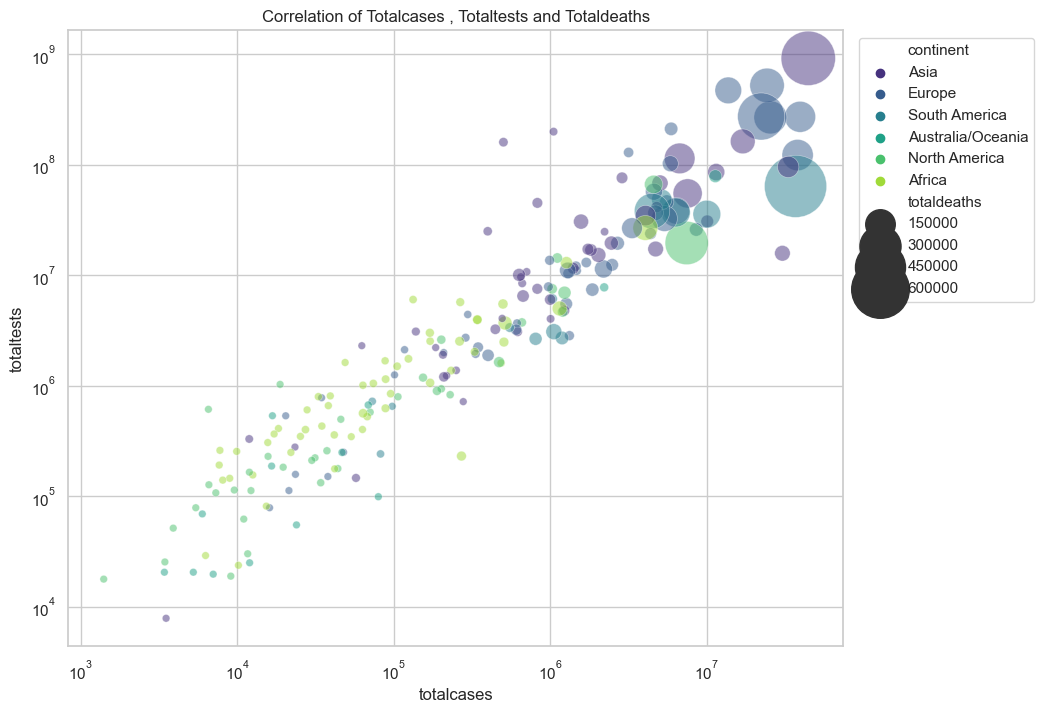

In [386]:
countries_df=covid19_df[8:-8]
countries_df.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10,8))
plt.xscale('log')
plt.yscale('log')
sns.set(style="ticks", color_codes=True)
sns.scatterplot(data=countries_df,x='totalcases',y='totaltests',size="totaldeaths",hue="continent",legend=True,palette="viridis", edgecolors="black",alpha=0.5,sizes=(30,2000)).set(title='Correlation of Totalcases , Totaltests and Totaldeaths')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()


- Biểu đồ thể hiện mối tương quan của tổng số ca nhiễm bệnh và tổng số ca xét nghiệm. Độ to nhỏ của mỗi điểm dữ liệu phụ thuộc vào ca tử vong của mỗi nước.
- Mối quan hệ giữa hai cột này thể hiện mối tương quan dương khá rõ ràng. Các nước có tỷ lệ mắc nhiễm bệnh càng nhiều thì thực hiện xét nghiệm covid càng nhiều. Rõ ràng thì số lượng xét nghiệm của một nước luôn cao hơn nhiều so với số lượng ca mắc của nước đó điều đó chứng tỏ rằng các nước này luôn thực hiện xét nghiệm thường xuyên để đảm bảo chọn lọc kỹ càng người mắc bệnh và người không mắc bệnh. Nhờ vậy mà các cơ quan chính quyền có thể đảm bảo an toàn và kiểm soát dịch bệnh một cách dễ dàng.
- Các nước có số ca tử vong cao là các nước có số lượng người nhiễm bệnh nhiều qua hàng loạt lượt xét nghiệm.
- Đặc biệt Bắc Mỹ và Châu Á là nơi có số lượng người mắc bệnh và tử vong cao nhất thế giới 
- Châu Phi là nơi có số người nhiễm bệnh và tử vong ít nhất lúc bấy giờ.

## 5.4. Câu hỏi số 4 <a name = "section5_4"></a>
[Quay về mục lục](#TOC)

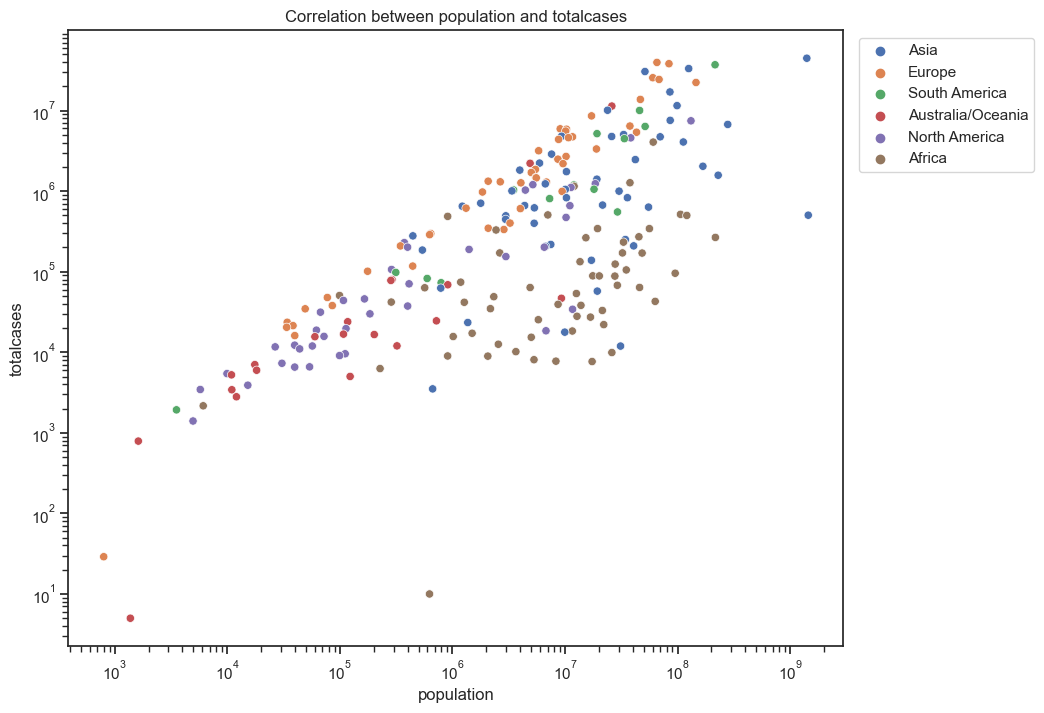

In [387]:
fig, ax = plt.subplots(figsize=(10,8))
plt.xscale('log')
plt.yscale('log')
sns.set(style="ticks", color_codes=True)
sns.scatterplot(data=countries_df,x='population',y='totalcases',hue='continent').set(title='Correlation between population and totalcases')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()

- Ta thấy được rằng biểu đồ thể hiện mối quan hệ tương quan dương giữa hai cột dữ liệu. Tức là quốc gia có dân số càng đông thì số ca mắc bệnh ở các nước đó cũng tăng theo. 
- Đặc biệt Châu Á và Châu Phi, ta thấy rằng các điểm dữ liệu tập trung hầu hết ở quanh vị trí 1 triệu dân tương ứng với 100 nghìn ca nhiễm thì các điểm dữ liệu bắt đầu thưa dần và xuất hiện các outliers.

## 5.5. Câu hỏi số 5 <a name = "section5_5"></a>
[Quay về mục lục](#TOC)

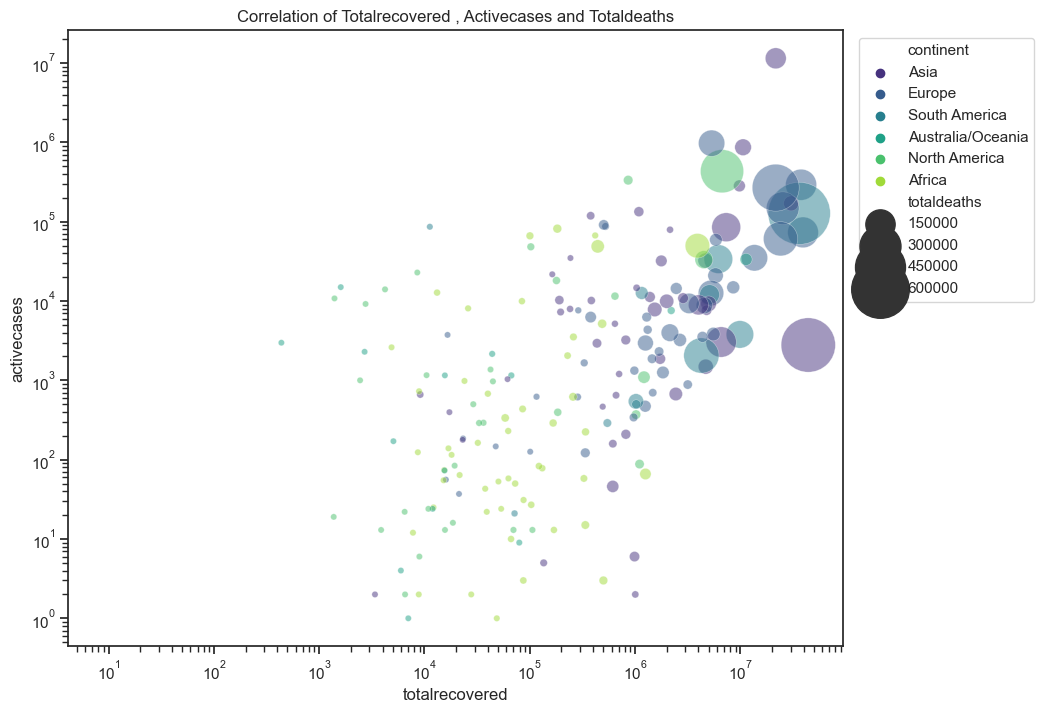

In [388]:
fig, ax = plt.subplots(figsize=(10,8))
plt.xscale('log')
plt.yscale('log')
sns.set(style="ticks", color_codes=True)
sns.scatterplot(data=countries_df,y='activecases',x='totalrecovered',size="totaldeaths",hue="continent",legend=True,palette="viridis", edgecolors="black",alpha=0.5,sizes=(20,2000)).set(title='Correlation of Totalrecovered , Activecases and Totaldeaths')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()


- Dựa theo biểu đồ trên ta thấy được hai cột dữ liệu không có mối tương quan rõ ràng. 
- Nhưng vẫn thể hiện được rằng điểm dữ liệu của các nước có người đang nhiễm bệnh trãi đều từ thấp đến cao ( từ dưới 10 người đến hàng chục triệu người). Trong khi đó các điểm dữ liệu thể hiện tổng số người đã khỏi bệnh ở các nước bắt đầu từ hàng ngàn người đến hàng trăm triệu người. Qua đó mà ta có thể thấy được rằng nền y tế của các nước đang thực hiện rất tốt nhiệm vụ chữa trị cho người dân của mình.
- Lượng lớn người tử vong tập trung phần lớn ở các nước châu Mỹ và châu Á là những nước luôn có số người hồi phục nhiều hơn so với số người đang nhiễm bệnh.  

## 5.6. Mối quan hệ giữa totaldeaths, total recovered và activecases (trực quan bằng barchart) <a name = "section5_6"></a>
[Quay về mục lục](#TOC)

- 

In [ ]:
covid19_df_bar = covid19_df[covid19_df['country_other'] == 'Total:'].copy().reset_index()

covid19_df_bar = covid19_df_bar[['continent','totaldeaths','totalrecovered','activecases', 'totalcases']]
covid19_df_bar = covid19_df_bar[covid19_df_bar['continent']!='All']
covid19_df_bar = covid19_df_bar.groupby(['continent']).sum()
covid19_df_bar = np.log(covid19_df_bar)

In [ ]:
deaths = list(covid19_df_bar['totaldeaths'])
recovered =  list(covid19_df_bar['totalrecovered'])
active =  list(covid19_df_bar['activecases'])

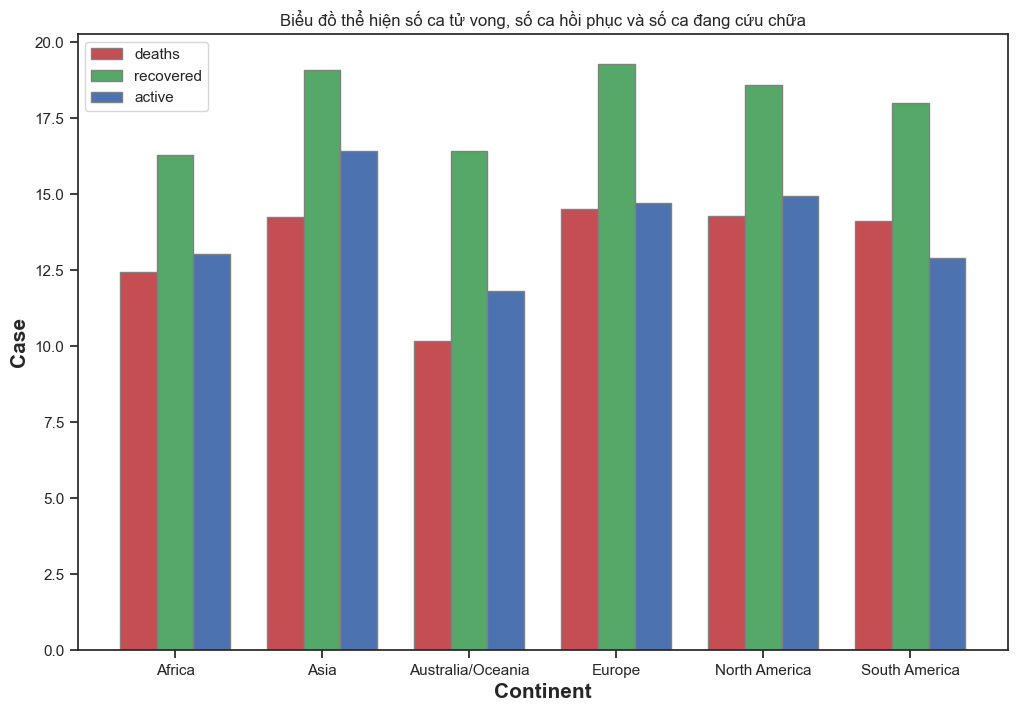

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(deaths))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, deaths, color ='r', width = barWidth,
        edgecolor ='grey', label ='deaths')
plt.bar(br2, recovered, color ='g', width = barWidth,
        edgecolor ='grey', label ='recovered')
plt.bar(br3, active, color ='b', width = barWidth,
        edgecolor ='grey', label ='active')
plt.title('Biểu đồ thể hiện số ca tử vong, số ca hồi phục và số ca đang cứu chữa')

plt.xlabel('Continent', fontweight ='bold', fontsize = 15)
plt.ylabel('Case', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(deaths))], covid19_df_bar.index)
 
plt.legend()
plt.show()

Biểu đồ barchart cho thấy rằng:
- Trừ các nước trong khu vực Africa và Oceania ra thì các nước trong khu vực khác có số ca hồi phục rất nhiều. 
- Còn số ca đang điều trị và số ca tử vong rất ít.
Từ những điều trên cũng có nghĩa là tổng số ca của các nước trong 4 khu vực rất lớn so với 2 khu vực Africa và Oceania.

## 5.7. Câu hỏi số 7 <a name = "section5_7"></a>
[Quay về mục lục](#TOC)

In [395]:
covid19_df_hist = covid19_df.copy()

In [396]:
df = np.log(covid19_df_hist['totalcases'])

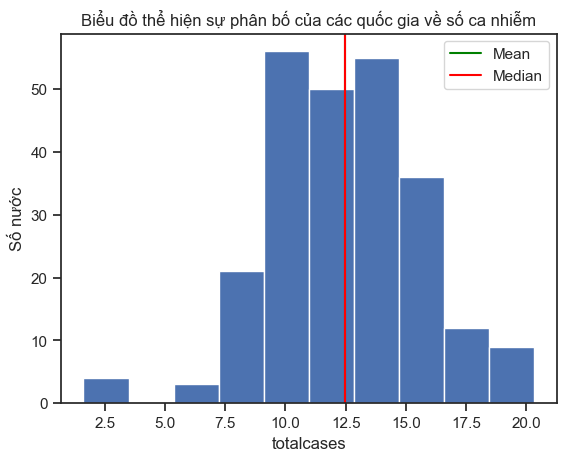

In [397]:
plt.hist(df)
plt.xlabel('totalcases')
plt.ylabel('Số nước')
plt.title('Biểu đồ thể hiện sự phân bố của các quốc gia về số ca nhiễm')


plt.axvline(df.mean(), color='green', label="Mean")
plt.axvline(df.median() , color='red', label= "Median")
plt.legend()

plt.show()

Biều đồ histogram đã thể hiện rằng:
- Sự phân bố số ca nhiễm trên 1 triệu dân của các nước trên thế giới khoảng 100 nước có số ca nhiễm dưới 200000 ca / 1 triệu dân, từ 200000 ca - 400000 ca / 1 triệu dân có khoảng 00 nước và còn lại là các nước có số ca lớn hơn 400000/ 1 triệu dân.
- Mean và Meadian của biểu đồ histogram này được nằm nghiên về bên trái nhiều hơn điều đó có nghĩa là số nước ít ca nhiễm nhiều hơn số nước nhều ca nhiễm.

In [398]:
df_1 = np.log(covid19_df_hist['totaldeaths'])

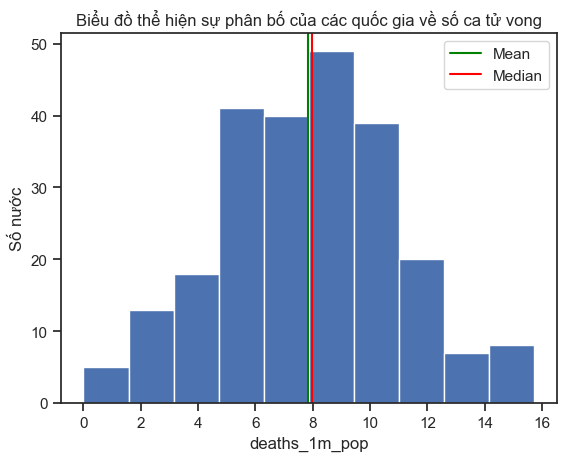

In [399]:
plt.hist(df_1)
plt.xlabel('deaths_1m_pop')
plt.ylabel('Số nước')
plt.title('Biểu đồ thể hiện sự phân bố của các quốc gia về số ca tử vong')


plt.axvline(df_1.mean(), color='green', label="Mean")
plt.axvline(df_1.median() , color='red', label= "Median")
plt.legend()

plt.show()

Cũng tương tự như vậy, đây là biểu đồ thể hiện sự phân bố ca tử vong trên 1 triệu người.
- Ta cũng thấy các đường median và mean đều nằm nghiêng về bên trái nhiều hơn là bên phải. Điều đó cho biết rằng số ca không cứu chữa được ít hơn, và điều đó cũng nói lên rằng nhiều nước trên thế giới đã tìm ra được các phương pháp để cứu người kịp thời, đồng thời hạn chế sự lây lan của dịch bệnh.

## 5.8. Câu hỏi số 8 <a name = "section5_8"></a>
[Quay về mục lục](#TOC)

- Trước tiên lựa chọn những hàng cần thiết để có thể vẽ donut chart. Ở đây ta sẽ chọn những cột 'continent','totaldeaths','totalrecovered','activecases', 'totalcases' vì biểu đồ diễn tả mối quan hệ thành phần tác động đến tổng thể dữ liệu và ép kiểu cho phù hợp.

In [ ]:

df = covid19_df[covid19_df['country_other'] == 'Total:'].reset_index()
df

,index,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,238,Total:,124725126,NaN,1612592.0,NaN,120021937.0,NaN,3090597.0,7892.0,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,239,Total:,214494303,19555.0,1537456.0,125.0,199126511.0,17607.0,13830336.0,15479.0,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,240,Total:,246578283,18461.0,2019397.0,48.0,242121931.0,24102.0,2436955.0,6475.0,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
3,241,Total:,68046073,167.0,1350933.0,8.0,66293956.0,111.0,401184.0,10185.0,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,242,Total:,14015805,NaN,26203.0,NaN,13852354.0,NaN,137248.0,55.0,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
5,243,Total:,12796416,12.0,258590.0,NaN,12076475.0,NaN,461351.0,548.0,...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
6,244,Total:,721,NaN,15.0,NaN,706.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,245,Total:,680656727,38195.0,6805186.0,181.0,653493870.0,43375.0,20357671.0,40634.0,...,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN


- Sau đó ta sẽ góp nhóm theo từng khu vực để tiện cho việc vẽ biểu đồ theo từng khu vực.

In [ ]:
df = df[['continent','totaldeaths','totalrecovered','activecases', 'totalcases']]
df = df[df['continent']!='All']
df

,continent,totaldeaths,totalrecovered,activecases,totalcases
0,North America,1612592.0,120021937.0,3090597.0,124725126
1,Asia,1537456.0,199126511.0,13830336.0,214494303
2,Europe,2019397.0,242121931.0,2436955.0,246578283
3,South America,1350933.0,66293956.0,401184.0,68046073
4,Australia/Oceania,26203.0,13852354.0,137248.0,14015805
5,Africa,258590.0,12076475.0,461351.0,12796416
6,NaN,15.0,706.0,0.0,721


In [ ]:

test = df.groupby(['continent']).sum()
test

,totaldeaths,totalrecovered,activecases,totalcases
continent,,,,
Africa,258590.0,12076475.0,461351.0,12796416
Asia,1537456.0,199126511.0,13830336.0,214494303
Australia/Oceania,26203.0,13852354.0,137248.0,14015805
Europe,2019397.0,242121931.0,2436955.0,246578283
North America,1612592.0,120021937.0,3090597.0,124725126
South America,1350933.0,66293956.0,401184.0,68046073


- Xử lý dữ liệu để có thể tiện vẽ biểu đồ.

In [ ]:
list_re = df.groupby(['continent'],sort=False).sum()
test = list(map(float, list_re[['totaldeaths','totalrecovered','activecases']].values.flatten()))
test

[1612592.0,
 120021937.0,
 3090597.0,
 1537456.0,
 199126511.0,
 13830336.0,
 2019397.0,
 242121931.0,
 2436955.0,
 1350933.0,
 66293956.0,
 401184.0,
 26203.0,
 13852354.0,
 137248.0,
 258590.0,
 12076475.0,
 461351.0]

- Cuối cùng là vẽ biểu đồ thể hiện mối tương quan của các trường dữ liệu đã chọn.

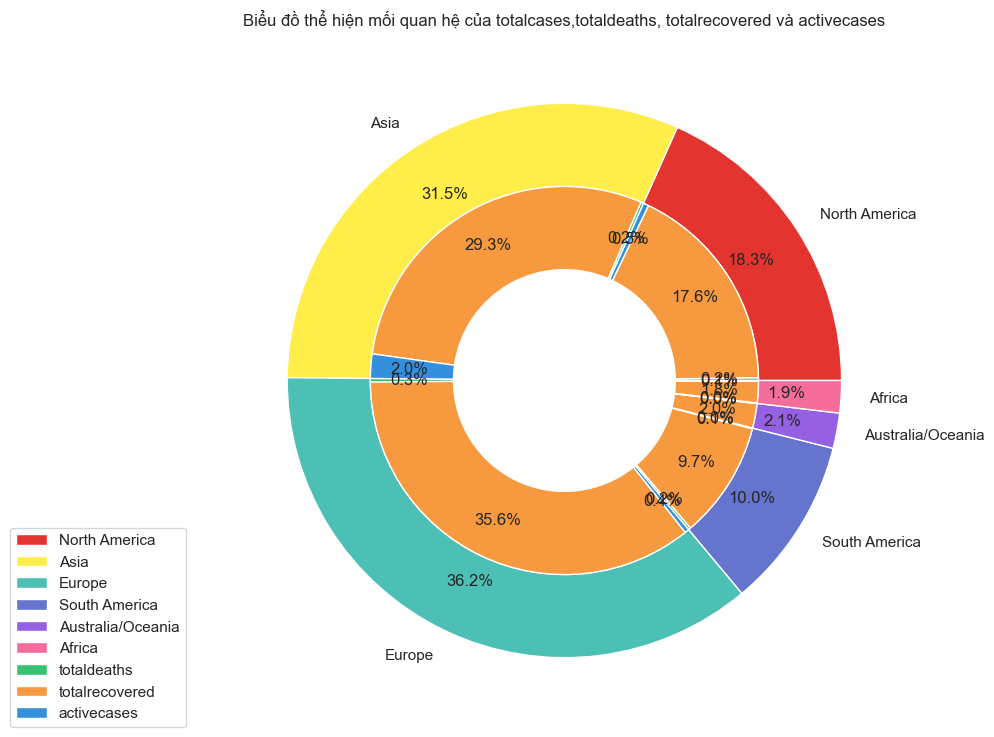

In [ ]:
fig, ax = plt.subplots(figsize = (10,9))
size = 0.3

labels = list (df['continent'].loc[:5]) 
mycolor1 = ['#e3342f','#ffed4a','#4dc0b5','#6574cd','#9561e2','#f66d9b']
ax.pie(df['totalcases'][:6],labels=df['continent'][:6], radius=1,
       autopct='%1.1f%%', pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'),colors=mycolor1)

labels_2 = ['totaldeaths', 'totalrecovered', 'activecases']
mycolor2 = ['#38c172','#f6993f','#3490dc',]
ax.pie(test, radius=1-size, 
       autopct='%1.1f%%', pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'), colors=mycolor2)

all_labels = labels + labels_2

ax.set(aspect="equal", title='Biểu đồ thể hiện mối quan hệ của totalcases,totaldeaths, totalrecovered và activecases')
plt.legend(all_labels,loc=(-0.3, 0))

ax.set()
plt.show()

Từ biểu đồ donutchart, ta thấy được:
- Ở vòng tròn thứ nhất, tức là vòng ngoài cùng, đó là totalcases của các khu vực. Trong đó các khu vực Asia, Europe chiếm tỉ trọng khá cao, cụ thể lần lượt là 31.5% và 36.2%, đồng nghĩa là các nước trong khu vực này sẽ nhiều tổng ca bao gồm ca nhiễm, ca hồi phục và ca tử vong. Tiếp theo, các khu vực chiếm tỉ trọng tương đối là South America và North America. Cuối cùng là các nước ở khu vực Africa và Australia/Oceania, chiểm tỉ trọng thấp nhất trong biểu, cũng có thể xem là tổng số ca ít nhất so với các khu vực khác.
- Để có thể hiểu rõ hơn từng khu vực, ta có thể xem vòng tròn thứ hai, tức là vòng tròn trong cùng, mỗi khu vực sẽ bao gồm totaldeaths, totalrecovered, activecases để thể tỉ trọng trong từng khu vực. Như ta thấy thì số ca hồi phục chiểm nhiều hơn so với số ca nhiễm và số ca tử vong. Cũng chính vì điều đó đã cho ta thấy được y tế được cải thiện rất nhiều so với những năm trước, Chính phủ đã quan tâm tới sức khoẻ của người dân nhiều hơn hoặc là đã tìm ra các phương pháp cứu chữa để làm giảm số ca tử vong.


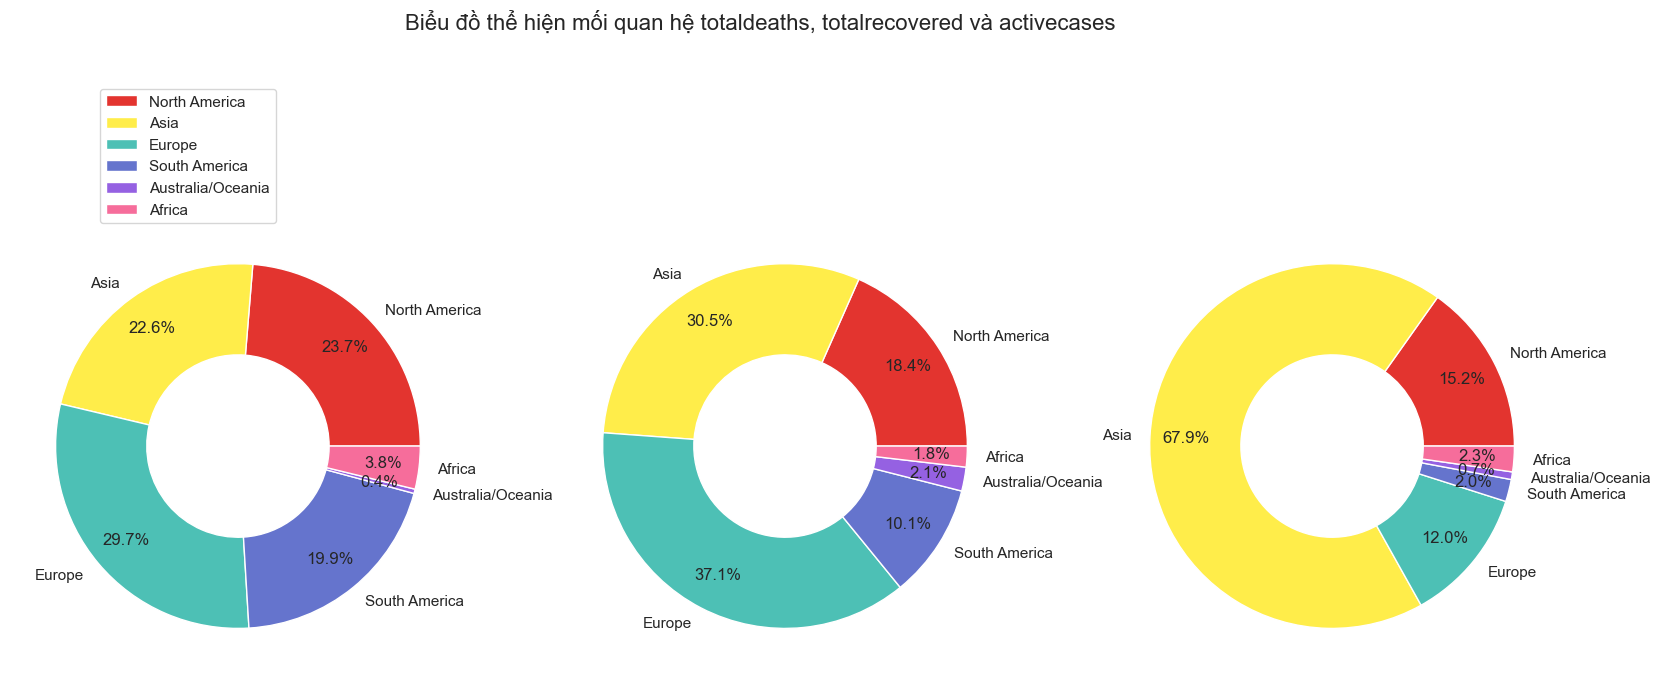

In [ ]:
fig, ax = plt.subplots(1,3,figsize = (20,9))
size = 0.3
label = df['continent'][:6]
mycolor = ['#e3342f','#ffed4a','#4dc0b5','#6574cd','#9561e2','#f66d9b']

ax[0].pie(df['totaldeaths'][:6],labels=label, radius=1,wedgeprops=dict(width=.5),
       autopct='%1.1f%%', pctdistance=0.8,colors=mycolor)

ax[1].pie(df['totalrecovered'][:6],labels=label, radius=1,wedgeprops=dict(width=.5),
       autopct='%1.1f%%', pctdistance=0.8,colors=mycolor)

ax[2].pie(df['activecases'][:6],labels=label, radius=1,wedgeprops=dict(width=.5),
       autopct='%1.1f%%', pctdistance=0.8,colors=mycolor)

labels_2 = list (df['continent'].loc[:5])
ax[0].legend(label, loc = "best", bbox_to_anchor = (0.1, 0.5,0.5,0.8))

fig.suptitle('Biểu đồ thể hiện mối quan hệ totaldeaths, totalrecovered và activecases', fontsize=16)

plt.show()

## 5.9. Câu hỏi số 9 <a name = "section5_9"></a>
[Quay về mục lục](#TOC)

In [403]:
a = covid19_df[covid19_df['continent'] == 'Asia']['totalcases'].tolist()
a1 = covid19_df[covid19_df['continent'] == 'North America']['totalcases'].tolist()
a2 = covid19_df[covid19_df['continent'] == 'Europe']['totalcases'].tolist()
a3 = covid19_df[covid19_df['continent'] == 'South America']['totalcases'].tolist()
a4 = covid19_df[covid19_df['continent'] == 'Australia/Oceania']['totalcases'].tolist()
a5 = covid19_df[covid19_df['continent'] == 'Africa']['totalcases'].tolist()
data = [a,a1,a2,a3,a4,a5]
for i in data:
    i.pop(0)
    i.pop(len(i)-1)



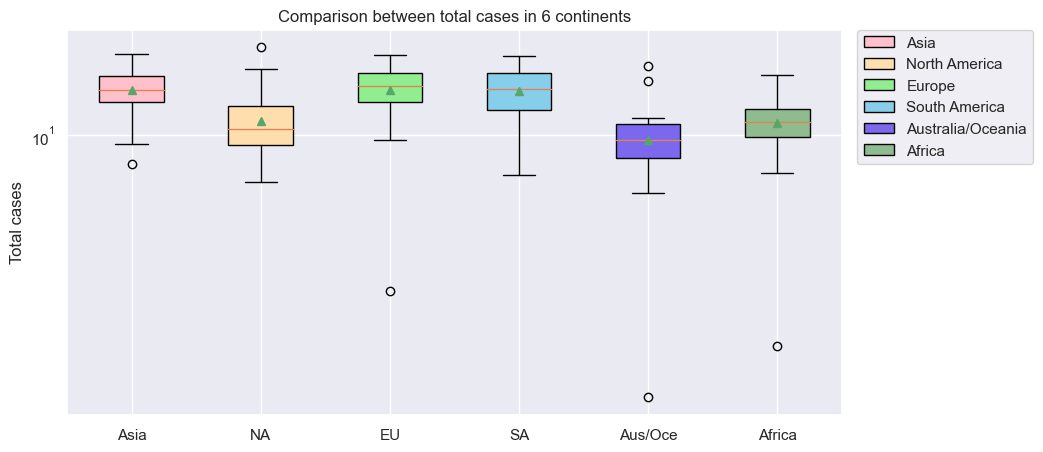

In [404]:
sns.set()   
log_d = [np.log(x)for x in data]
colors = ['pink', 'navajowhite', 'lightgreen','skyblue','mediumslateblue','darkseagreen']
fig, ax = plt.subplots(figsize=(10, 5))
bplot = ax.boxplot(log_d, showmeans=True,vert=True, patch_artist= True)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


ax.set_yscale('log')
ax.set_xticklabels(['Asia', 'NA', 'EU', 'SA','Aus/Oce', 'Africa'])
ax.set_ylabel('Total cases')
ax.set_title('Comparison between total cases in 6 continents')


#ax.plot([x2, x3], [y2, y3], 'k-')
#ax.set_facecolor('lightblue')

ax.xaxis.grid(True)
plt.legend([bplot["boxes"][0], bplot["boxes"][1],bplot["boxes"][2],bplot["boxes"][3],bplot["boxes"][4],bplot["boxes"][5]], ['Asia', 'North America','Europe','South America',  'Australia/Oceania','Africa'],bbox_to_anchor=(1.02, 1),loc='upper left', borderaxespad=0)

plt.show()




### Phân tích Boxplot
- Giá trị trung vị của 2 khu vực châu Á và châu Âu cao nhất, đồng nghĩa với việc có số ca nhiễm cao nhất thế giới.
- Khu vực Bắc Mỹ có khoảng IQR lớn nhất cho thấy sự đa dạng ca nhiễm ở các nước khu vực này.
- Khu vực Australia/Oceania có nhiều outlier là vì khu vực này có khoảng 2 3 quốc gia lớn, dân cư đông, các quốc gia còn lại nhỏ và ít dân, có quốc gia chỉ có  dân số trên 1000 người

### Kiểm Định Giả Thuyết Thống Kê
#### Câu hỏi đặt ra: Liệu trung bình số ca nhiễm của khu vực châu Âu có ít hơn Nam Mỹ không? 
1. Giả thuyết:
- H<sub>0</sub>: Trung bình số ca nhiễm ở khu vực châu Âu và Nam Mỹ  không có sự khác biệt đáng kể
- H<sub>1</sub>: Trung bình số ca nhiễm ở khu vực châu Âu và Nam Mỹ có sự khác biệt đáng kể, cụ thể là châu Âu ít hơn Nam Mỹ

2. Kiểm định:

| Khu vực | Phương sai | Kích cỡ mẫu |
|:----:|:---:|:------:|
| Châu Âu | 86621836912598.46875  |  10 |
| Nam Mỹ| 95136071331036.203125  | 10|

- Lấy ra mẫu ngẫu nhiên gồm số ca nhiễm ở 10 quốc gia của châu Âu và Nam Mỹ:

| Châu Âu:| 615119 | 1863398 |5568084|994037|288552|1462976|5871458|4391007|23583|117477|
|------|-----|--------|-----|---|---|---|---|---|---|---|
| Nam Mỹ: | 808401  | 10044125   |73075|6360089|5177770|98041|1930|1057121|1034303|552051|

- Cho độ tin cậy bằng 95% ⇒ Bác bỏ H<sub>0</sub> khi Z < -1.65
- Z = -0.1314  > -1.65 ⇒  Không bác bỏ H<sub>0</sub>
- Kết luận: Với độ tin cậy 95% thì tỉ trung bình số ca nhiễm ở khu vực châu Âu và Nam Mỹ  không có sự khác biệt đáng kể


---

# **6. Đôi điều về đồ án** <a name = "section6"></a>
[Quay về mục lục](#TOC)

Mỗi thành viên gặp khó khăn gì?
- Tập dữ liệu bị bias khá nhiều, cần tốn khá nhiều thời gian để xử lý hợp lý.

Mỗi thành viên học được những gì?
- Biết cách phân bổ thời gian hợp lí.

Nếu có thêm thời gian, sẽ làm những gì?
- Xem lại những câu hỏi cũ, có thể là cụ thể hóa những câu hỏi đó để có thể tìm được đáp án gần chính xác nhất.
- Có thể áp dụng các mô hình học máy khác để tìm ra được mô hình tô nhất, từ đó có thể phục vụ cho các câu hỏi liên quan.

---

# **7. Nguồn tham khảo** <a name = "section7"></a>
[Quay về mục lục](#TOC)